# Movie Scripts - An Analysis
### Act 2
_"The force will be with you, always."_

The saga continues with Act 2. In act one, we loaded the data, cleaned it up, and visualized the connections in a single film - V for Vendetta. Here, we're going to dig a little deeper on another film - Star Wars: the Empire Strikes Back.

### 1) Imports and data loading!


In [203]:
%matplotlib inline 

import numpy as np
import pandas as pd
import os
import re
import pickle
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


In [204]:
# load the data pickled last time
mov = pickle.load(open("mov2_script.pkl", "rb"))
tagged_script = pickle.load(open("mov2_tagged_script.pkl", "rb"))
scenes = pickle.load(open("mov2_scenes.pkl", "rb"))


The second episode in the original trilogy packs an emotional punch, so let's try to tap into that: we're going to perform some sentiment analysis and track it over the course of the movie. 

To do so, we'll use the (appropriately named) <code>vaderSentiment</code> package, which is lexicon based. We'll append the compound sentiment score to the tuple for each line. 

In [205]:
sentiment_scenes = list() # create a new list 
a = SentimentIntensityAnalyzer() # start with an analyzer
for scene in scenes: # for each scene
    sc = list()
    for char, line in scene: # for each line in the scene 
        sc.append((char, line,a.polarity_scores(line)["compound"])) # append the compound sentiment score (-1,1)
    sentiment_scenes.append(sc) 


In [206]:
sentiment_scenes[3]

[('LEIA', ' Han!', 0.0),
 ('HAN', ' Yes, Your Highnessness?', 0.4019),
 ('LEIA', ' I thought you decided to stay.', 0.0),
 ('HAN',
  ' Well, the bounty hunter we ran into on Ord Mantell changed my mind.',
  0.2732),
 ('LEIA', ' Han, we need you!', 0.0),
 ('HAN', ' We?', 0.0),
 ('LEIA', ' Yes.', 0.4019),
 ('HAN', ' Oh, what about you need?', 0.0),
 ('LEIA', " I need?  I don't know what you're talking about.", 0.0),
 ('HAN', " You probably don't.", 0.0),
 ('LEIA', ' And what precisely am I supposed to know?', 0.0),
 ('HAN',
  ' Come on!  You want me to stay because of the way you feel about me.',
  0.1511),
 ('LEIA',
  " Yes.  You're a great help to us. You're a natural leader...",
  0.9001),
 ('HAN', " No!  That's not it.  Come on. Aahhh - uh huh!  Come on.", -0.4184),
 ('LEIA', '', 0.0),
 ('HAN',
  ' Am I?  Then why are you following me?  Afraid I was going to leave without giving you a goodbye kiss?',
  0.2741),
 ('LEIA', " I'd just as soon kiss a Wookiee.", 0.4215),
 ('HAN', ' I can 

For a contentious scene, there sure are a lot of positive scores. Let's look at the scores per scene over time.

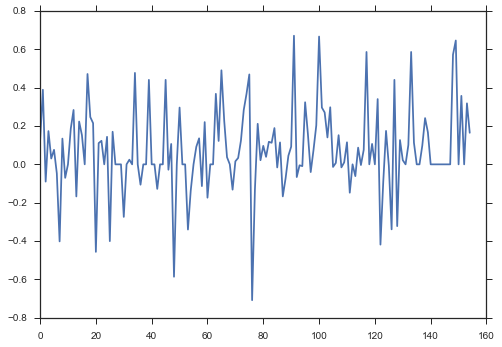

In [207]:
avg_sentiments = [np.mean([c for (a,b,c) in scene]) for scene in sentiment_scenes] # take mean sentiment per scene
plt.plot(avg_sentiments)
plt.show()

This isn't great, since there are a lot of 0's, and also some scenes are just 1 line long so they skew the chart. Let's remove the 0's weight the lines by how much dialogue there is, and take a moving average to smooth things out. 

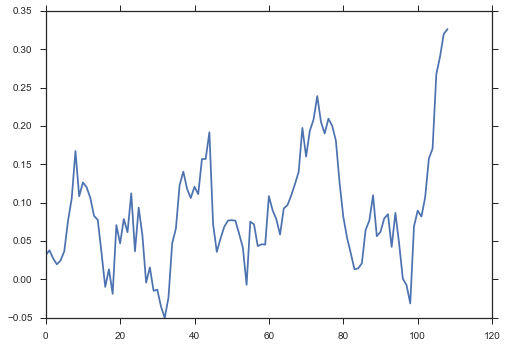

In [208]:
# taken from stack overflow https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
def moving_average(a, n=3): 
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# take mean sentiment per scene and multiple by number of lines in the scene
avg_sentiments2 = [np.mean([c for (a,b,c) in scene]) for scene in sentiment_scenes] 
avg_sentiments2 = [i for i in avg_sentiments if i != 0] # ignore zero-scenes
avg_sentiments2 = moving_average(avg_sentiments2,10) 
plt.plot(avg_sentiments2)
plt.show()

I'd rather not read the tea leaves on this one, except to say the movie ends on a high note - but this isn't really good enough. 

Let's ignore scene breaks because they're approximate in that any time the camera cuts, a scene is marked. But with directors like George Lucas who cut frequently, its not as effective. Also, action can imply positive and negative sentiment, that's ignored if we only pay attention to dialogue. We'll use a much wider moving average window, so we can capture the essence of a moment rather than a point estimate. 

In [209]:
a = SentimentIntensityAnalyzer() # start with an analyzer
sentiments = []
lines = []
for l,t in tagged_script:
    if (t != "scene") & (t != "other"):
        s = a.polarity_scores(l)["compound"]
        if s != 0:
            sentiments.append(s)
            lines.append(l)

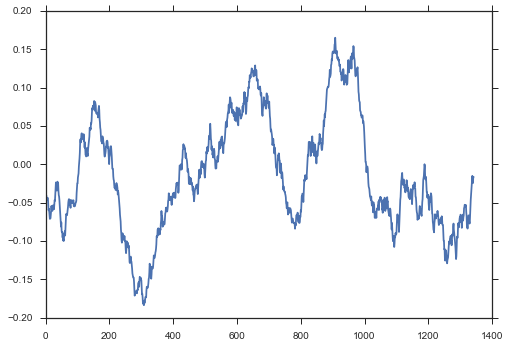

In [210]:
plt.plot(moving_average(sentiments,100))
plt.show()

I feel more confident in this graph. Let's map peaks and troughs to points in the film:

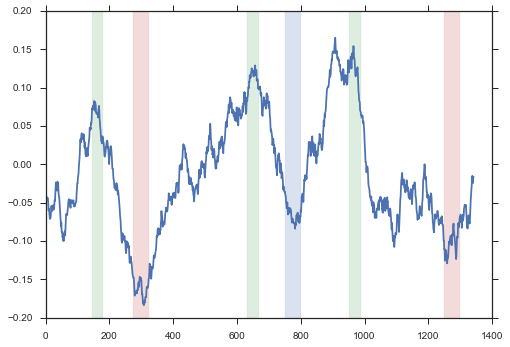

In [212]:
plt.plot(moving_average(sentiments,100))
plt.axvspan(145, 180, alpha = 0.2, color = "g")
plt.axvspan(275, 325, alpha = 0.2, color = "r")
plt.axvspan(630, 670, alpha = 0.2, color = "g")
plt.axvspan(750, 800, alpha = 0.2, color = "b")
plt.axvspan(950, 990, alpha = 0.2, color = "g")
plt.axvspan(1300, 1250, alpha = 0.2, color = "r")

In [213]:
lines[140:180] #  +  Grateful Han and Leia for Luke's survival
lines[275:325] #  -  the Battle of Hoth
lines[630:670] #  +  Romantic connection between Leia and Han
lines[750:800] # +/- Luke's training with Yoda and his confrontation with Vader's presence in the cave
lines[950:990] #  +  Han+team meeting Lando
lines[1250:1300]# -  Han+team escaping while Luke fights Vader
print 

We're gonna try doing some predictive analyses in the next episode!